In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


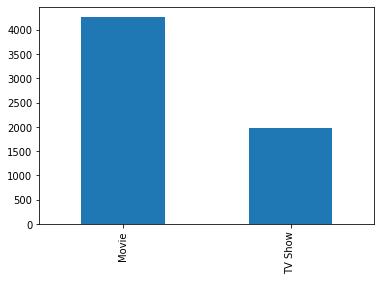

In [9]:
df["type"].value_counts().plot(kind="bar")

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")

nodes = []

# Create nodes
for i in range(len(df)):
    show_id = df["show_id"][i]
    type = df["type"][i]
    title = df["title"][i]
    directors = df["director"][i]
    casts = df["cast"][i]
    countries = df["country"][i]
    date_added = df["date_added"][i]
    release_year = df["release_year"][i]
    rating = df["rating"][i]
    duration = df["duration"][i]
    categories = df["listed_in"][i]
    description = df["description"][i]
    
    show = {"node_type": "show",
            "show_id": show_id, "type": type, "label": title, "date_added": date_added, 
            "release_year": release_year, "rating": rating,
            "duration": duration, "description": description}
    
    nodes.append(show)
    
    if str(directors) != "nan":
        for director in str(directors).split(", "):
            person = {"node_type": "person", "label": director, "type": "director"}
            if person not in nodes:
                nodes.append(person)
                
    if str(casts) != "nan":
        for cast in str(casts).split(", "):
            person = {"node_type": "person", "label": cast, "type": "cast"}
            if person not in nodes:
                nodes.append(person)
                
    if str(countries) != "nan":
        for country in str(countries).split(", "):
            c = {"node_type": "country", "label": country}
            if c not in nodes:
                nodes.append(c)
                
    if str(categories) != "nan":
        for category in str(categories).split(", "):
            cat = {"node_type": "category", "label": category}
            if cat not in nodes:
                nodes.append(cat)

id = 0

for node in nodes:
    node["node_id"] = id
    id += 1

In [39]:
len(nodes)

37449

In [45]:
edges = []
# Create Edges
for i in range(len(df)):
    title = df["title"][i]
    directors = df["director"][i]
    casts = df["cast"][i]
    countries = df["country"][i]
    categories = df["listed_in"][i]
    
    for node in nodes:
        if node["node_type"] == "show" and node["label"] == title:
            title_id = node["node_id"]
            
        if str(directors) != "nan":
            for director in str(directors).split(", "):
                if node["node_type"] == "person" and node["label"] == director:
                    director_id = node["node_id"]
                    
                    edge = {"source": director_id, "target": title_id, "label": "directs"}
                    edges.append(edge)
                    
                    
        if str(casts) != "nan":
            for cast in str(casts).split(", "):
                if node["node_type"] == "person" and node["label"] == cast:
                    cast_id = node["node_id"]
                    
                    edge = {"source": cast_id, "target": title_id, "label": "acts in"}
                    edges.append(edge)
                    
        if str(countries) != "nan":
            for country in str(countries).split(", "):
                if node["node_type"] == "country" and node["label"] == country:
                    country_id = node["node_id"]
                    
                    edge = {"source": title_id, "target": country_id, "label": "available in"}
                    edges.append(edge)
                    
        if str(categories) != "nan":
            for category in str(categories).split(", "):
                if node["node_type"] == "category" and node["label"] == category:
                    category_id = node["node_id"]
                    
                    edge = {"source": title_id, "target": category_id, "label": "belongs in"}
                    edges.append(edge)
        

In [46]:
len(edges)

71383

In [59]:
def ifna(key):
    if key in node:
        var = node[key]
    else:
        var = ""
    return var
        
nodes_list = []

for node in nodes:
    node_id = node["node_id"]
    node_type = node["node_type"]
    label = node["label"]
    
    type = ifna("type")
    release_year = ifna("release_year")
    date_added = ifna("date_added")
    rating = ifna("rating")
    duration = ifna("duration")
    description = ifna("description")
    
    node_row = [node_id, node_type, label, type, date_added, release_year, rating, duration, description]
    nodes_list.append(node_row)

In [60]:
nodes_list[0:5]

[[0,
  'show',
  'Norm of the North: King Sized Adventure',
  'Movie',
  '',
  2019,
  'TV-PG',
  '90 min',
  'Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.'],
 [1, 'person', 'Richard Finn', 'director', '', '', '', '', ''],
 [2, 'person', 'Tim Maltby', 'director', '', '', '', '', ''],
 [3, 'person', 'Alan Marriott', 'cast', '', '', '', '', ''],
 [4, 'person', 'Andrew Toth', 'cast', '', '', '', '', '']]

In [63]:
import csv

with open("nodes.csv", "w", newline="", encoding="utf-8") as file:
    header = ["node_id", "node_type", "label", "type", "date_added", "release_year", "rating", "duration", "description"]
    
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(nodes_list)

In [67]:
edges_list = []

for edge in edges:
    source = edge["source"]
    target = edge["target"]
    label = edge["label"]
    
    edge_row = [source, target, label]
    edges_list.append(edge_row)

In [ ]:
edges_list[0:5]

In [70]:
with open("edges.csv", "w", newline="", encoding="utf-8") as file:
    header = ["source", "target", "label"]
    
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(edges_list)